In [ ]:
import os 
from google.colab import drive
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [ ]:
system_path = '/content/drive/MyDrive/GitHub/INM363-Project'
drive.mount('/content/drive')
sys.path.append(system_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
chkpt_root = "/content/drive/MyDrive/GitHub/INM363-Project/model_checkpoints/icm/dense_new_pattern" 
results_pth = chkpt_root + '/' + 'result.csv'
icm_df = pd.read_csv(results_pth) 

icm_df['eps_cumsum'] = icm_df['episodes_this_iter'].cumsum()
icm_df.checkpoint = icm_df['checkpoint'].astype(int)
icm_df.tail()

,Unnamed: 0,Unnamed: 0.1,checkpoint,eps_reward_min,eps_reward_mean,eps_reward_max,eps_len_mean,episodes_this_iter,eps_cumsum
595,595,295,596,0.0,2.05,13.0,184.46,22.0,13312.0
596,596,296,597,0.0,2.40,15.0,180.69,25.0,13337.0
597,597,297,598,0.0,2.81,15.0,172.94,25.0,13362.0
598,598,298,599,0.0,2.71,15.0,174.99,21.0,13383.0
599,599,299,600,0.0,2.49,15.0,178.77,20.0,13403.0


In [ ]:

chkpt_root = "/content/drive/MyDrive/GitHub/INM363-Project/model_checkpoints/re3/dense_new_pattern" 
results_pth = chkpt_root + '/' + 'result.csv'
re3_df = pd.read_csv(results_pth) 

re3_df['eps_cumsum'] = re3_df['episodes_this_iter'].cumsum()
re3_df.checkpoint = re3_df['checkpoint'].astype(int)
re3_df.tail()

,Unnamed: 0,checkpoint,eps_reward_min,eps_reward_mean,eps_reward_max,eps_len_mean,episodes_this_iter,eps_cumsum
295,295,296,0.0,8.74,16.0,63.82,64.0,15486.0
296,296,297,0.0,9.88,16.0,63.36,62.0,15548.0
297,297,298,0.0,9.41,15.0,63.62,64.0,15612.0
298,298,299,0.0,8.71,15.0,66.87,59.0,15671.0
299,299,300,0.0,9.46,15.0,59.84,69.0,15740.0


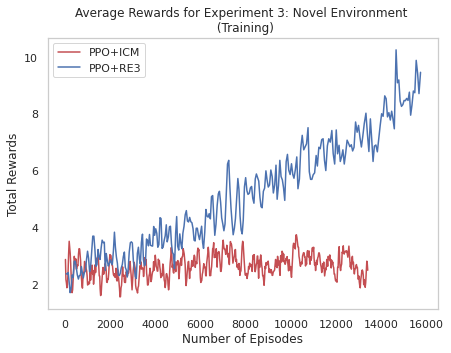

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})

#plt.plot(ppo_df['eps_cumsum'], ppo_df['eps_reward_mean'], 'k-', label='PPO')

plt.plot(icm_df['eps_cumsum'], icm_df['eps_reward_mean'], 'r-', label='PPO+ICM')

plt.plot(re3_df['eps_cumsum'], re3_df['eps_reward_mean'], 'b-', label='PPO+RE3')


plt.legend()
plt.title("Average Rewards for Experiment 3: Novel Environment \n (Training)") 
plt.xlabel('Number of Episodes') 
plt.ylabel('Total Rewards') 
plt.show()

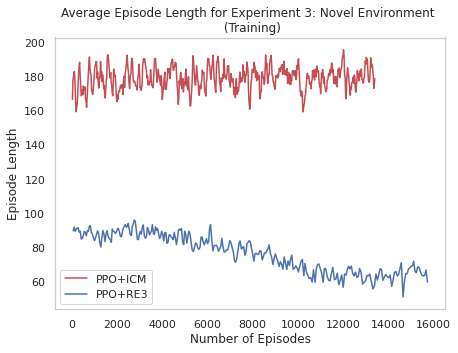

In [ ]:
plt.rcParams["figure.figsize"] = (7,5)

plt.plot(icm_df['eps_cumsum'], icm_df['eps_len_mean'], 'r-', label='PPO+ICM')

plt.plot(re3_df['eps_cumsum'], re3_df['eps_len_mean'], 'b-', label='PPO+RE3')
plt.legend()
plt.title("Average Episode Length for Experiment 3: Novel Environment \n (Training)") 
plt.xlabel('Number of Episodes') 
plt.ylabel('Episode Length') 
plt.show()